## Principles and Applications of Data Science (Spring 2020)
## Homework 3
## Due: June 24, 2020

### Name: 張文有
### Student ID Number: 105590009

### Homework Description
This assignment is to practice how to generate a linear regression from a numeric dataset.We provide the weather data ﬁle (`Weather_2009_2016.csv`) for practice. In the dataset, there are twelve attributes; however, we only interest the eleven attributes for exploring the linear regression. These attributes are 
<font color=green>
1. Temperature (degC) 
2. Pressure (mbar)     
3. Tdew (degC)        
4. rh (%)             
5. VPdef (mbar)       
6. sh (g/kg)          
7. H2OC (mmol/mol)    
8. rho (g/m^3)       
9. wv (m/s)          
10. max. wv (m/s)      
11. wd (deg)            
</font>

The last ten columns are independent variables and the first one is the dependent variable. Assume the linear regression can be denoted as
$$ \textbf{y}  =  c + a_1 \textbf{x}_1  + \dots + a_{10} \textbf{x}_{10} $$
$y$ is the dependent variable, $x_i$'s are independent variables, $c$ is the constant and $a_i$ are the coeﬃcients of the linear regression. Please show the coeﬃcients of the linear regression in order (i.e., $c, a_1, a_2,..., a_{10}$) with the following approaches:

1. Calculate the linear regression from the raw data directly. (You can choose one of the approaches in class for implementation; of course, you must make sure that you won't get a singular matrix if you use the matrix approach.)
2. Generate a *heatmap* for the diagonal correlation matrix with attributes and show your observation.
3. Explore multiple variables with *scatter plot*. The scatter plot of Pandas is a grid of plots of multiple variables one against the other, showing the relationship of each variable to the others. Please state what you observe.
4. Improve the linear regression from question 1 and get a new linear regression if the coeﬃcients  are meaningless.


In [1]:
from itertools import islice
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

from sklearn import datasets

data = pd.read_csv("Weather_2009_2016.csv")
print('Keys:', data.keys())
data.info()
data.head()


Keys: Index(['Date Time', 'Temperature (degC)', 'Pressure (mbar)', 'Tdew (degC)',
       'rh (%)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)',
       'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date Time           420551 non-null  object 
 1   Temperature (degC)  420551 non-null  float64
 2   Pressure (mbar)     420551 non-null  float64
 3   Tdew (degC)         420551 non-null  float64
 4   rh (%)              420551 non-null  float64
 5   VPdef (mbar)        420551 non-null  float64
 6   sh (g/kg)           420551 non-null  float64
 7   H2OC (mmol/mol)     420551 non-null  float64
 8   rho (g/m**3)        420551 non-null  float64
 9   wv (m/s)            420551 non-null  float64
 10  max. wv (m/s)       420551 non-null  float64
 11  

,Date Time,Temperature (degC),Pressure (mbar),Tdew (degC),rh (%),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,-8.02,996.52,-8.90,93.3,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,-8.41,996.57,-9.28,93.4,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,-8.51,996.53,-9.31,93.9,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,-8.31,996.51,-9.07,94.2,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,-8.27,996.51,-9.04,94.1,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [2]:
data.drop('Date Time', axis=1, inplace=True)
target = data['Temperature (degC)']
data.drop('Temperature (degC)', axis=1, inplace=True)
data.head()

,Pressure (mbar),Tdew (degC),rh (%),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.90,93.3,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-9.28,93.4,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-9.31,93.9,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-9.07,94.2,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-9.04,94.1,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


#### 1. Calculate the linear regression from the raw data directly. (You can choose one of the approaches in class for implementation; of course, you must make sure that you won’t get a singular matrix if you use the matrix approach.)

In [3]:
# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [4]:
Ans1 = LinearRegression(n_jobs=-1)
Ans1.fit(X_train, y_train)
Ans1.score(X_test, y_test)
print("Answer1:", Ans1.score(X_test, y_test))

Answer1: 0.9998951146966734


#### 2. Generate a heatmap for the diagonal correlation matrix with attributes and show your observation. 

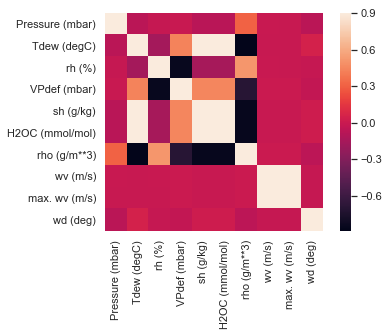

In [5]:
sns.heatmap(data.corr(), vmax = .9, square = True)

#### 3. Explore multiple variables with scatter plot. The scatter plot of Pandas is a grid of plotsn of multiple variables one against the other, showing the relationship of each variable to the others. Please state what you observe.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013254778160>,
      dtype=object)

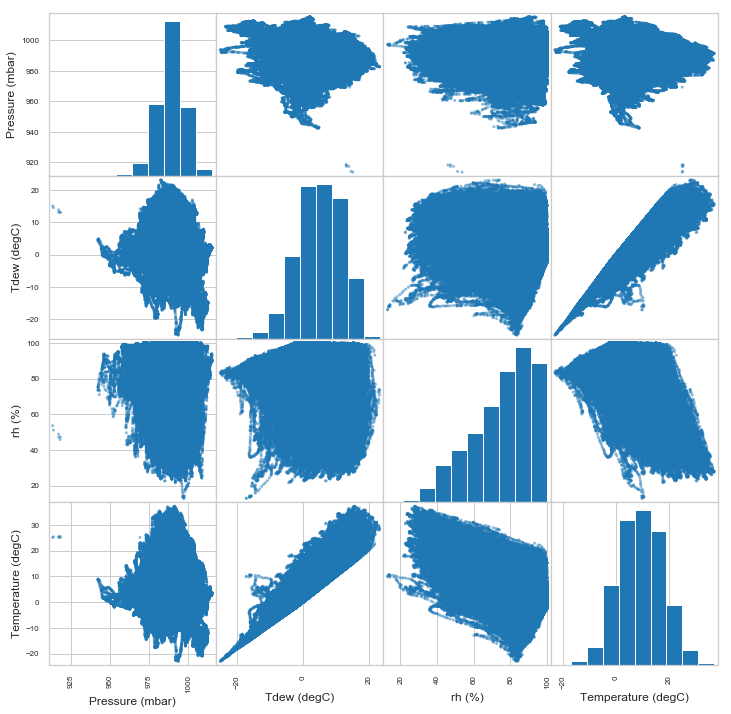

In [45]:
df_scatter = pd.DataFrame(data[['Pressure (mbar)', 'Tdew (degC)', 'rh (%)']],columns ={'Pressure (mbar)', 'Tdew (degC)', 'rh (%)'})
df_scatter['Temperature (degC)'] = target
pd.plotting.scatter_matrix(df_scatter, figsize = (12.0, 12.0))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000132517CADD8>,
      dtype=object)

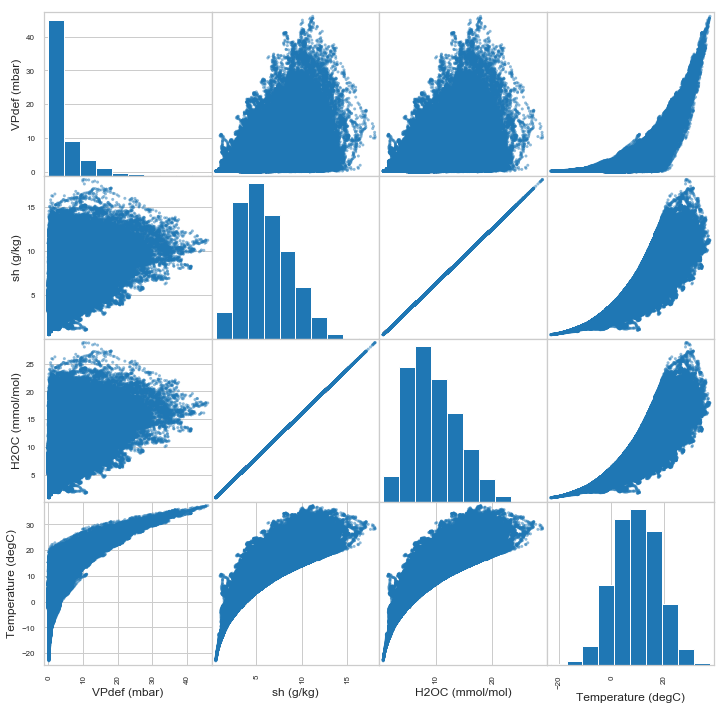

In [47]:
df_scatter = pd.DataFrame(data[['VPdef (mbar)', 'sh (g/kg)','H2OC (mmol/mol)']],columns ={'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)'})
df_scatter['Temperature (degC)'] = target
pd.plotting.scatter_matrix(df_scatter, figsize = (12.0, 12.0))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013255357FD0>,
      dtype=object)

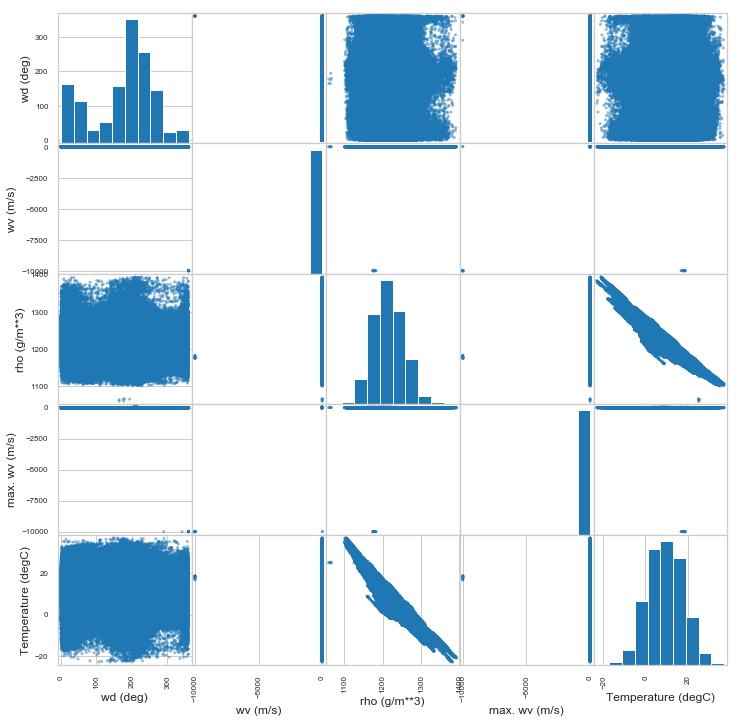

In [48]:
df_scatter = pd.DataFrame(data[[ 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)','wd (deg)']]
                          ,columns ={ 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)','wd (deg)'})
df_scatter['Temperature (degC)'] = target
pd.plotting.scatter_matrix(df_scatter, figsize = (12.0, 12.0))

###  經過上圖的觀察，我們發現wv (m/s)、max. wv(m/s)與溫度較無相關。

#### 4. Improve the linear regression from question 1 and get a new linear regression if the coefficients are meaningless.

In [5]:
regr_feat1 =LinearRegression()
for i in range(0,10):
    feat1 = X_train.iloc[:, i: i+1]
    regr_feat1.fit(feat1, y_train)    
    print('Feature:', data.columns[i])
    print('Score:', regr_feat1.score(feat1, y_train)) 

Feature: Pressure (mbar)
Score: 0.0020000753875656363
Feature: Tdew (degC)
Score: 0.8020009319530916
Feature: rh (%)
Score: 0.32825827802978536
Feature: VPdef (mbar)
Score: 0.5806941346942645
Feature: sh (g/kg)
Score: 0.7509062761877066
Feature: H2OC (mmol/mol)
Score: 0.7516385703347462
Feature: rho (g/m**3)
Score: 0.9280049682891969
Feature: wv (m/s)
Score: 2.9284721832723015e-05
Feature: max. wv (m/s)
Score: 1.2306446573795427e-05
Feature: wd (deg)
Score: 0.0015121983947611328


In [55]:
improve_data = data.drop(['wv (m/s)', 'max. wv (m/s)'], axis=1)

In [56]:
# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(improve_data, target, test_size=0.3, random_state=42)

In [57]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9998951149768858

#### 改善前：0.9998949992551727
#### 改善後：0.9998951149768858
#### 相差了0.0000001157217131

### 經過上面的證明，我們發現刪除 wv (m/s), max. wv (m/s) 改善了 linear regression的準確率。